In [1]:
import requests, re, json, progressbar, yaml
import os
import pandas as pd
import datadotworld as dw
import numpy as np
import datetime 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Pull data from data.world & describe columns
stat_data = dw.load_dataset("tatertot53/baseball-analysis",force_update=True)
# stat_data.describe()

In [3]:
#Shows key values for DF creation
stat_data.dataframes

LazyLoadedDict({'batting': LazyLoadedValue(<pandas.DataFrame>), 'bls_data_series': LazyLoadedValue(<pandas.DataFrame>), 'cpi_1985_2017_raw': LazyLoadedValue(<pandas.DataFrame>), 'fangraphs_ss_data': LazyLoadedValue(<pandas.DataFrame>), 'fielding': LazyLoadedValue(<pandas.DataFrame>), 'real_median_hh_income': LazyLoadedValue(<pandas.DataFrame>), 'salaries': LazyLoadedValue(<pandas.DataFrame>), 'teams': LazyLoadedValue(<pandas.DataFrame>)})

In [4]:
#Create Batting DF
batting_df = stat_data.dataframes['batting']
batting_df.columns


C:\Users\ckent\Anaconda3\envs\PythonData\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using batting schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 12
  'Error: {}'.format(resource_name, e))


Index(['playerid', 'yearid', 'stint', 'teamid', 'lgid', 'g', 'ab', 'r', 'h',
       '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh',
       'sf', 'gidp'],
      dtype='object')

In [5]:
#Create Salary DF
salary_df = stat_data.dataframes['salaries']

In [6]:
#Create Teams DF
teams_df = stat_data.dataframes['teams']

C:\Users\ckent\Anaconda3\envs\PythonData\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using teams schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 7
  'Error: {}'.format(resource_name, e))


In [7]:
#Create Fielding DF
fielding_df = stat_data.dataframes['fielding']

C:\Users\ckent\Anaconda3\envs\PythonData\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using fielding schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 7
  'Error: {}'.format(resource_name, e))


In [8]:
#Create FanGraphs Advanced Stats DF
fanGraphs_df = stat_data.dataframes['fangraphs_ss_data']
fanGraphs_df.columns

C:\Users\ckent\Anaconda3\envs\PythonData\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using fangraphs_ss_data schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 17
  'Error: {}'.format(resource_name, e))


Index(['season', 'name', 'team', 'g', 'pa', 'hr', 'r', 'rbi', 'sb', 'bb', 'k',
       'iso', 'babip', 'avg', 'obp', 'slg', 'woba', 'wrc', 'bsr', 'off', 'def',
       'war', 'playerid'],
      dtype='object')

In [9]:
#Rename columns & remove Unnecessary Columns
fanGraphs_df = fanGraphs_df.rename(columns={'season':'yearid','name':'fullname','team':'teamid'})

fanGraphs_df['nameFirst'] = fanGraphs_df.fullname.str.split(' ', expand=True)[0]
fanGraphs_df['nameLast'] = fanGraphs_df.fullname.str.split(' ', expand=True)[1]

advanced_batting = fanGraphs_df[['yearid','nameFirst','nameLast','hr','pa','teamid','babip','obp','slg',
                                 'woba','wrc','bsr','off','def','war']]
advanced_batting.head(10)


,yearid,nameFirst,nameLast,hr,pa,teamid,babip,obp,slg,woba,wrc,bsr,off,def,war
0,1991,Cal,Ripken,34,717,Orioles,0.304,0.374,0.566,0.405,154.0,0.8,46.9,31.8,10.6
1,2002,Alex,Rodriguez,57,725,Rangers,0.290,0.392,0.623,0.424,158.0,4.7,56.1,19.6,10.0
2,2000,Alex,Rodriguez,41,672,Mariners,0.333,0.420,0.606,0.431,158.0,1.3,54.4,22.6,9.5
3,1996,Alex,Rodriguez,36,677,Mariners,0.382,0.414,0.631,0.443,159.0,1.0,56.0,15.8,9.2
4,2003,Alex,Rodriguez,47,715,Rangers,0.305,0.396,0.600,0.416,151.0,4.3,50.3,18.2,9.2
5,1995,John,Valentin,27,621,Red Sox,0.296,0.399,0.533,0.405,138.0,1.6,32.6,30.4,8.2
6,1998,Alex,Rodriguez,42,748,Mariners,0.324,0.360,0.560,0.394,135.0,3.6,37.8,16.5,7.9
7,2001,Alex,Rodriguez,52,732,Rangers,0.325,0.399,0.622,0.425,159.0,2.3,56.6,-1.9,7.8
8,1987,Alan,Trammell,28,668,Tigers,0.335,0.402,0.551,0.407,152.0,3.0,47.0,8.0,7.7
9,2000,Nomar,Garciaparra,21,599,Red Sox,0.378,0.434,0.599,0.432,154.0,0.2,44.4,15.0,7.6


In [10]:
#Create People DF from CSV at data.world
names = pd.read_csv("people.csv")
names_df = pd.DataFrame(names)

In [11]:
#Check column names for Player Name DF
names_df.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [12]:
#Change dtypes of "debut" and "finalGame"
names_df['debut'] = pd.to_datetime(names_df['debut'])  
names_df['finalGame'] = pd.to_datetime(names_df['finalGame'])
#names_df.info()

In [13]:
#Filter for all years >= 1985, remove unnecessary columns
# names_df = names_df[(names_df['debut'] >= datetime.date(1985,1,1)) | (names_df['finalGame'] >= datetime.date(1985,1,1))]
#names_df = names_df[names_df['finalGame'] >= datetime.date(1985,1,1)]
names_since_85 = names_df[['playerID','nameFirst','nameLast','nameGiven','debut','finalGame']]
names_since_85 = names_since_85.sort_values('finalGame')
#names_since_85.info()

In [14]:
#Check column names for Batting Stat DF
batting_df.columns

Index(['playerid', 'yearid', 'stint', 'teamid', 'lgid', 'g', 'ab', 'r', 'h',
       '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh',
       'sf', 'gidp'],
      dtype='object')

In [15]:
#Rename "playerID" column to match other DFs, filter for all years >= 1985, and remove unnecessary columns.
batting_df = batting_df.rename(columns={'playerid':'playerID'})
batting_df['ba'] = batting_df['h'] / batting_df['ab']
batting_df['ba'] = batting_df['ba'].map('{:.3f}'.format)
batting_df = batting_df[batting_df['yearid'] >= 1985]
batting_since_85 = batting_df[['playerID','yearid','teamid','lgid','g','ab','ba','r','h','2b','3b','hr','rbi','sb','cs',
                               'bb','so','ibb','hbp','sh','sf','gidp']]
batting_since_85.sample(10)

,playerID,yearid,teamid,lgid,g,ab,ba,r,h,2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
82835,nomurta01,2002,MIL,NL,21,0,nan,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
81475,muldema01,2001,OAK,AL,34,5,0.200,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
75129,rueteki01,1996,MON,NL,16,25,0.120,2,3,0,...,2.0,0.0,0.0,1,4.0,0.0,0.0,2.0,1.0,0.0
72429,mahompa01,1994,MIN,AL,22,0,nan,1,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
65449,burketi01,1988,MON,NL,61,2,0.000,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
74027,trachst01,1995,CHN,NL,30,49,0.265,3,13,2,...,4.0,0.0,0.0,2,17.0,0.0,0.0,6.0,1.0,0.0
79249,worreti01,1999,OAK,AL,53,0,nan,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
94310,bergju01,2011,CHN,NL,8,2,0.000,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
65071,ripkeca01,1987,BAL,AL,162,624,0.252,97,157,28,...,98.0,3.0,5.0,81,77.0,0.0,1.0,0.0,11.0,19.0
63742,lacyle01,1986,BAL,AL,130,491,0.287,77,141,18,...,47.0,4.0,6.0,37,71.0,2.0,0.0,4.0,5.0,12.0


In [16]:
#Check column names for Team Info DF
teams_df.columns

Index(['yearid', 'lgid', 'teamid', 'franchid', 'divid', 'rank', 'g', 'ghome',
       'w', 'l', 'divwin', 'wcwin', 'lgwin', 'wswin', 'r', 'ab', 'h', '2b',
       '3b', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf', 'ra', 'er', 'era',
       'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba', 'soa', 'e', 'dp', 'fp',
       'name', 'park', 'attendance', 'bpf', 'ppf', 'teamidbr',
       'teamidlahman45', 'teamidretro'],
      dtype='object')

In [17]:
#Filter for all years >= 1985, remove unnecessary columns
teams_df = teams_df[teams_df['yearid'] >= 1985]
teams_since_85 = teams_df[['yearid','rank','g','w','l','divwin','wswin','r','ab','h','2b','3b','hr','bb','so',
                     'sb','cs','hbp','sf','name']]
#teams_since_85.tail()

In [18]:
#Filter for all years >= 1985, rename PlayerID column to match other DFs
salary_df = salary_df[salary_df['yearid'] >= 1985]
salary_df = salary_df.rename(columns={'playerid':'playerID'})
salary_since_85 = salary_df[['yearid','playerID','salary']]
#salary_since_85.info()

In [19]:
#Check column names for Fielding Info DF
fielding_df.columns

Index(['playerid', 'yearid', 'stint', 'teamid', 'lgid', 'pos', 'g', 'gs',
       'innouts', 'po', 'a', 'e', 'dp', 'pb', 'wp', 'sb', 'cs', 'zr'],
      dtype='object')

In [20]:
#Filter for all years >= 1985, remove unnecessary columns
fielding_df = fielding_df.rename(columns={'playerid':'playerID'})
fielding_df = fielding_df[fielding_df['yearid'] >= 1985]
fielding_since_1985 = fielding_df[['playerID','yearid','pos','gs']]
#fielding_since_1985.head()

In [21]:
#Merging
merge_01 = pd.merge(names_since_85,salary_since_85, on='playerID', how='inner')
merge_01.sort_values('yearid')
merge_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26428 entries, 0 to 26427
Data columns (total 8 columns):
playerID     26428 non-null object
nameFirst    26428 non-null object
nameLast     26428 non-null object
nameGiven    26428 non-null object
debut        26428 non-null datetime64[ns]
finalGame    26428 non-null datetime64[ns]
yearid       26428 non-null int64
salary       26428 non-null int64
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.8+ MB


In [22]:
#Merging
merge_02 = pd.merge(merge_01,batting_since_85,on=['playerID','yearid'],how='inner')
merge_02.head()

,playerID,nameFirst,nameLast,nameGiven,debut,finalGame,yearid,salary,teamid,lgid,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,hasslan01,Andy,Hassler,Andrew Earl,1971-05-30,1985-05-07,1985,129166,SLN,NL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,fordda01,Dan,Ford,Darnell Glenn,1975-04-12,1985-05-31,1985,450000,BAL,AL,...,1.0,0.0,1.0,7,17.0,0.0,0.0,0.0,0.0,3.0
2,tellmto01,Tom,Tellmann,Thomas John,1979-06-09,1985-06-02,1985,207500,OAK,AL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,nolanjo01,Joe,Nolan,Joseph William,1972-09-21,1985-06-25,1985,341667,BAL,AL,...,6.0,0.0,0.0,5,5.0,1.0,0.0,0.0,1.0,1.0
4,zahnge01,Geoff,Zahn,Geoffrey Clayton,1973-09-02,1985-08-14,1985,550000,CAL,AL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Merging
merge_03 = pd.merge(merge_02,fielding_since_1985,on=['playerID','yearid'],how='inner')
#merge_03.info()

In [24]:
merge_03.columns

Index(['playerID', 'nameFirst', 'nameLast', 'nameGiven', 'debut', 'finalGame',
       'yearid', 'salary', 'teamid', 'lgid', 'g', 'ab', 'ba', 'r', 'h', '2b',
       '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf',
       'gidp', 'pos', 'gs'],
      dtype='object')

In [25]:
final_df = merge_03[merge_03['pos'] == 'SS']
final_df = final_df.sort_values('yearid')
#final_df.info()

In [26]:
year_counts = final_df['yearid'].value_counts()
#year_counts

QUESTION #1 - JORDAN'S CODE

In [27]:
#Advanced Stats playerID match
id_match = pd.merge(names_since_85,advanced_batting,on=['nameFirst','nameLast'],how='inner')
id_match = id_match[['playerID','nameFirst','nameLast','debut','finalGame','yearid','pa','babip','obp','slg','woba','wrc','bsr',
                    'off','def','war']]
id_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 0 to 2663
Data columns (total 16 columns):
playerID     2664 non-null object
nameFirst    2664 non-null object
nameLast     2664 non-null object
debut        2652 non-null datetime64[ns]
finalGame    2652 non-null datetime64[ns]
yearid       2664 non-null int64
pa           2664 non-null int64
babip        2664 non-null float64
obp          2664 non-null float64
slg          2664 non-null float64
woba         2664 non-null float64
wrc          2659 non-null float64
bsr          2664 non-null float64
off          2664 non-null float64
def          2664 non-null float64
war          2664 non-null float64
dtypes: datetime64[ns](2), float64(9), int64(2), object(3)
memory usage: 353.8+ KB


In [28]:
all_stats = pd.merge(id_match,final_df,on=['playerID','yearid'],how='inner')
all_stats.columns

Index(['playerID', 'nameFirst_x', 'nameLast_x', 'debut_x', 'finalGame_x',
       'yearid', 'pa', 'babip', 'obp', 'slg', 'woba', 'wrc', 'bsr', 'off',
       'def', 'war', 'nameFirst_y', 'nameLast_y', 'nameGiven', 'debut_y',
       'finalGame_y', 'salary', 'teamid', 'lgid', 'g', 'ab', 'ba', 'r', 'h',
       '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh',
       'sf', 'gidp', 'pos', 'gs'],
      dtype='object')

In [29]:
all_stats=all_stats.rename(columns={'nameFirst_x':'First_Name','nameLast_x':'Last_Name','yearid':'Season','salary':'Salary',
                                   'teamid':'Team','lgid':'League','war':'WAR'})
all_stats=all_stats[['playerID','First_Name','Last_Name','Season','Salary','Team','League','WAR','off','def','g','ab','ba','pa',
                     'r','h','2b','3b','hr','rbi','sb','cs','bb','so','ibb','hbp','sh','sf','gidp','pos','gs','babip','obp',
                     'slg','woba','wrc','bsr']]
all_stats = all_stats.sort_values('Season')
all_stats.tail()

,playerID,First_Name,Last_Name,Season,Salary,Team,League,WAR,off,def,...,sf,gidp,pos,gs,babip,obp,slg,woba,wrc,bsr
1889,ahmedni01,Nick,Ahmed,2016,521600,ARI,NL,0.1,-21.2,12.3,...,3.0,9.0,SS,80.0,0.258,0.265,0.299,0.245,42.0,0.9
1901,drewst01,Stephen,Drew,2016,3000000,WAS,NL,0.7,3.7,-2.1,...,4.0,3.0,SS,7.0,0.278,0.339,0.524,0.362,124.0,-1.2
2052,storytr01,Trevor,Story,2016,507500,COL,NL,2.9,13.3,1.6,...,1.0,5.0,SS,94.0,0.343,0.341,0.567,0.380,122.0,2.0
2077,descada01,Daniel,Descalso,2016,2100000,COL,NL,0.5,-1.7,-2.5,...,4.0,2.0,SS,31.0,0.305,0.349,0.424,0.332,90.0,1.8
2062,aybarer01,Erick,Aybar,2016,8500000,DET,AL,-1.2,-23.9,-2.5,...,0.0,1.0,SS,10.0,0.283,0.303,0.320,0.271,65.0,-3.9


In [30]:
all_stats.columns

Index(['playerID', 'First_Name', 'Last_Name', 'Season', 'Salary', 'Team',
       'League', 'WAR', 'off', 'def', 'g', 'ab', 'ba', 'pa', 'r', 'h', '2b',
       '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf',
       'gidp', 'pos', 'gs', 'babip', 'obp', 'slg', 'woba', 'wrc', 'bsr'],
      dtype='object')

In [31]:
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.axes import Subplot
import matplotlib.ticker as mtick
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as ff 
import time

# py.tools.set_credentials_file(username='tatertot53',api_key='7JD9pgKRttgpnCMYqOZV')

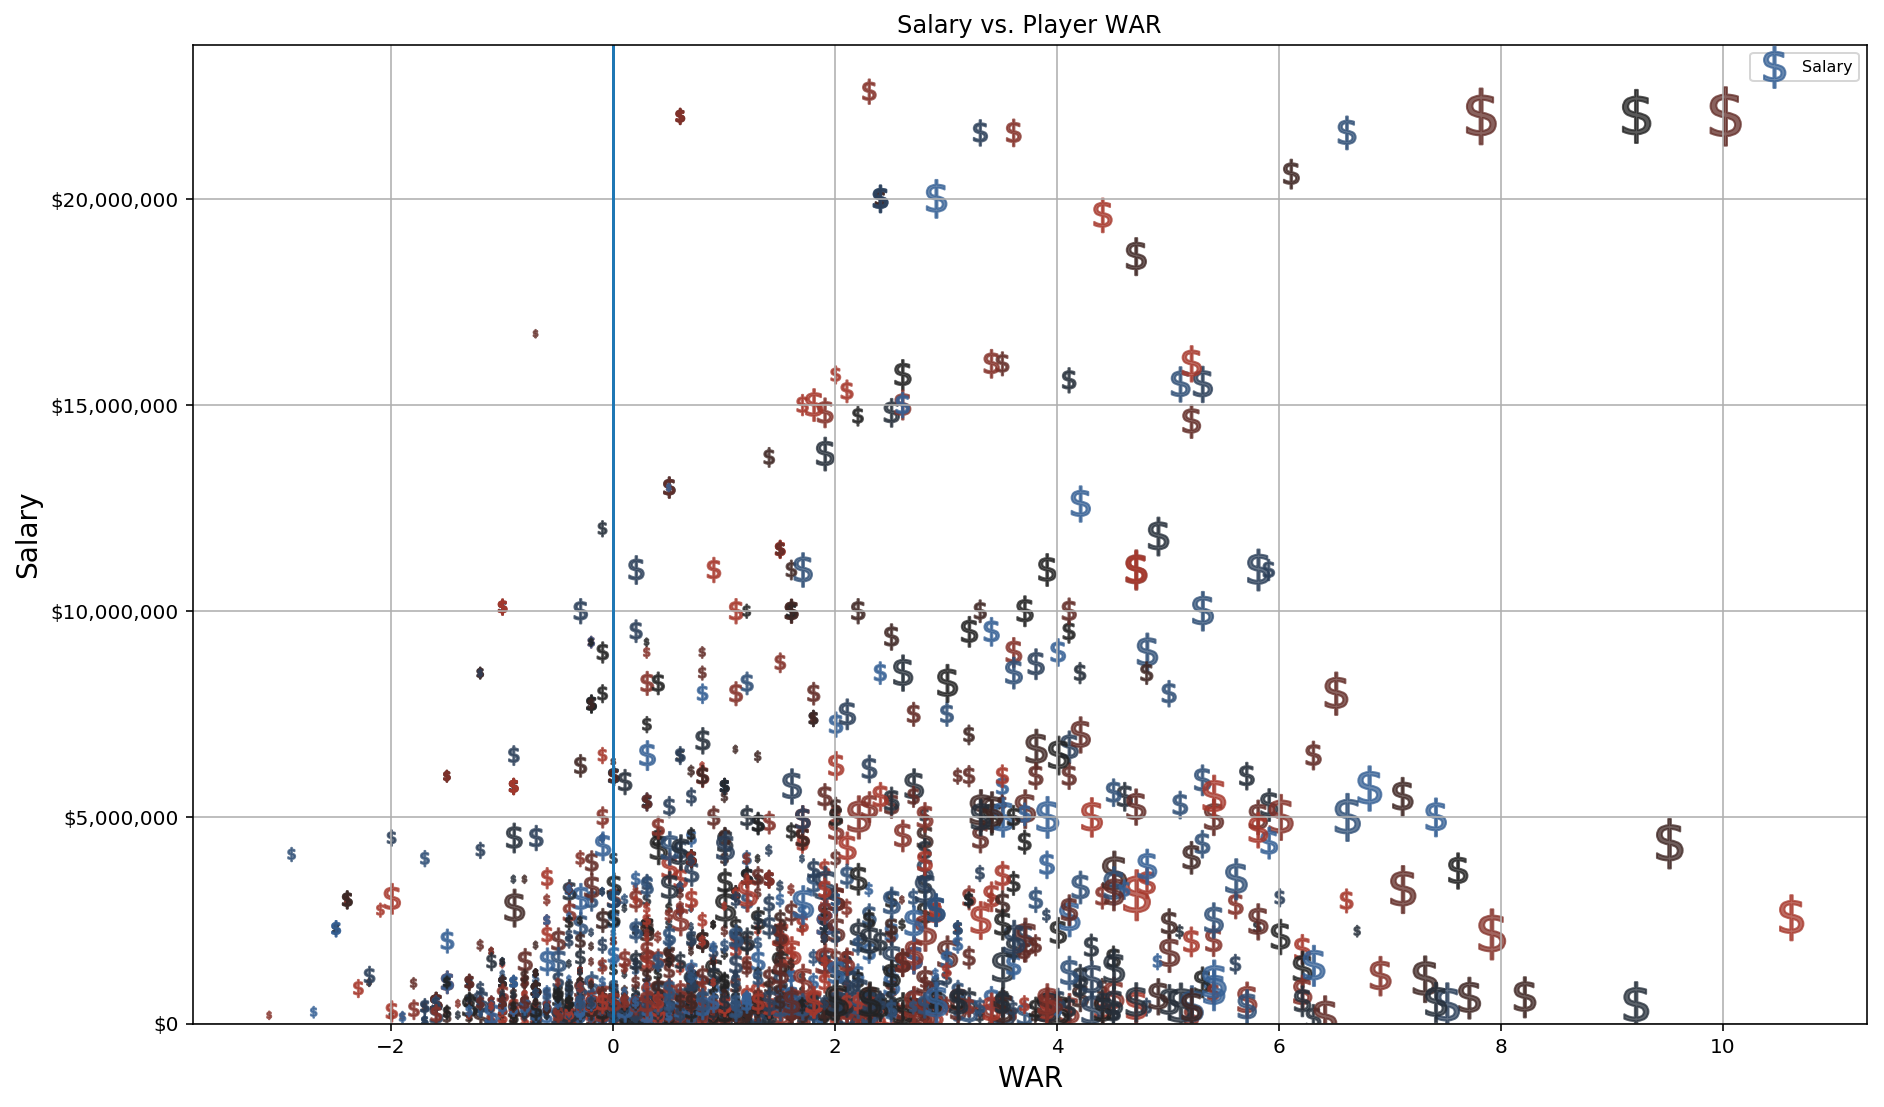

In [32]:
colors = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark");

plt.figure(figsize=(20,8))

fig, ax = plt.subplots(1)
fig.set_size_inches((15, 9))

bounds = np.linspace(all_stats['hr'].min(), all_stats['hr'].max(),5)
fname = all_stats['First_Name']
lname = all_stats['Last_Name']
year = all_stats['Season']
salary_year = all_stats['Salary']
war_year = all_stats['WAR']
games_year = all_stats['g']
runs_year = all_stats['r']
HR_year = all_stats['hr']
RBI_year = all_stats['rbi']
obp_year = all_stats['obp']
slg_year = all_stats['slg']
wrc_year = all_stats['wrc']


ax.scatter(war_year,salary_year,marker=r'$\$$',c=colors,alpha=0.75,s=HR_year*15)

# Incorporate the other graph properties
ax.set_ylim([0,None])
ax.axvline(0,0)
ax.set_title("Salary vs. Player WAR")
ax.set_ylabel("Salary",fontsize=14)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

ax.legend(loc='upper right', fancybox=True, fontsize=8)
ax.set_xlabel("WAR",fontsize=14)
ax.grid(True)
plt.savefig("salaryVSwar.png")

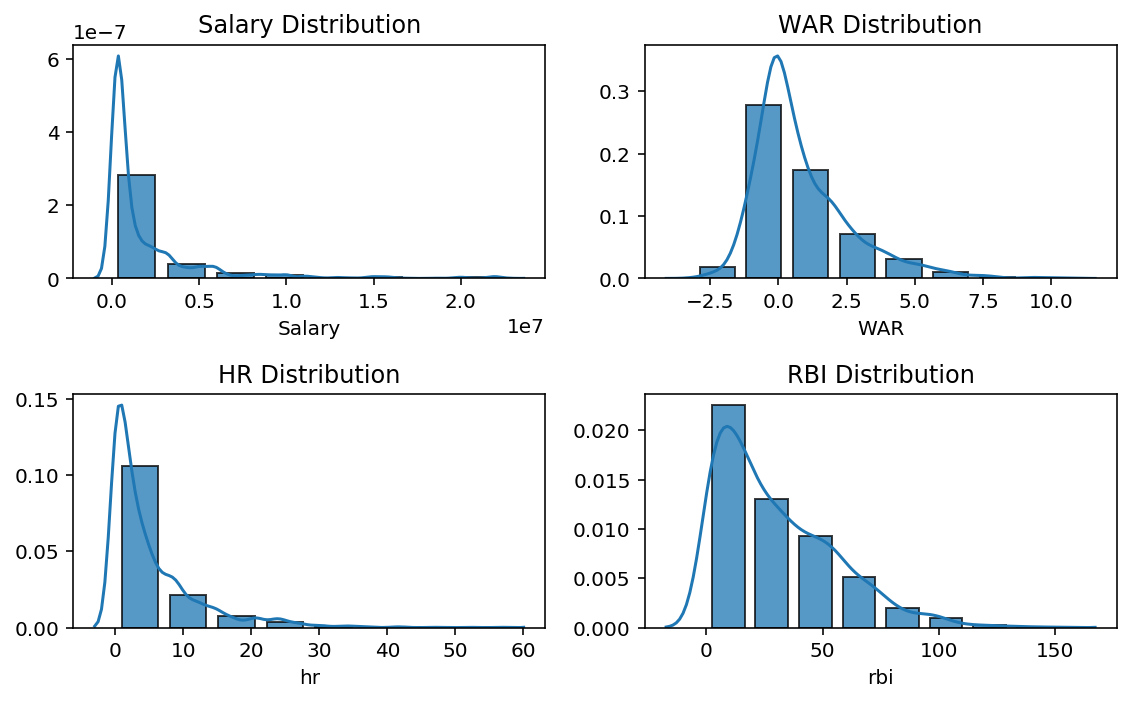

In [33]:
fig, ax = plt.subplots(2,2,figsize=(8,5))

sns.distplot(salary_year, bins=8,ax=ax[0][0],hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':0.75})
ax[0][0].set_title('Salary Distribution')

sns.distplot(war_year, bins=8, ax=ax[0][1],hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':0.75})
ax[0][1].set_title("WAR Distribution")

sns.distplot(HR_year, bins=8, ax=ax[1][0],hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':0.75})
ax[1][0].set_title("HR Distribution")

sns.distplot(RBI_year,bins=8, ax=ax[1][1],hist_kws={'rwidth':0.75,'edgecolor':'black', 'alpha':0.75})
ax[1][1].set_title("RBI Distribution")

plt.tight_layout()

In [34]:
# color=hr_total.values,
#         colorscale= 'bupu',
#         showscale=True,
#         symbol='circle',
#         sizemode='area',
#         sizeref=15,



trace = go.Scattergl(x=war_year,y=salary_year, mode='markers', 
                   marker = dict(size=8,color=year.values,colorscale='Electric',sizeref=15),
                                 line = dict(width=2, color='rgb(0,0,0)'), opacity = 0.6, 
                                 name='WAR', ids=all_stats['playerID'])

data = [trace]

layout = dict(title = 'WAR vs.Salary',hovermode='closest',
              xaxis=dict(title='WAR', ticklen=5,gridwidth=2), 
              yaxis=dict(title='Salary', autorange=True, fixedrange=True, hoverformat='$:.2f', ticklen=5,gridwidth=2),
              showlegend=True,legend=dict(x=-.1, y=1.2))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig,filename='statsPlot_allTheData')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tatertot53/0 or inside your plot.ly account where it is named 'statsPlot_allTheData'


In [35]:
trace1 = go.Scattergl(x=RBI_year,y=salary_year,mode='markers', 
                   marker = dict(size=8,color=year.values,colorscale='Portland',sizeref=15),
                                 line = dict(width=2, color='rgb(0,0,0)'), opacity = 0.75, 
                                 name='RBI', ids=lname)
data = [trace1]
layout = dict(title = 'RBI vs.Salary',hovermode='closest',
              xaxis=dict(title='Statistic', ticklen=5,gridwidth=2), 
              yaxis=dict(title='Salary', autorange=True, fixedrange=True, hoverformat='$:.2f', ticklen=5,gridwidth=2),
              showlegend=True,legend=dict(x=-.1, y=1.2))

fig1 = go.Figure(data=data, layout=layout)
py.iplot(fig1,filename='statsPlot_allTheData1')


In [36]:
trace2 = go.Scattergl(x=HR_year,y=salary_year,mode='markers',
                   marker = dict(size=8,color=year.values,colorscale='Bluered',sizeref=15),
                                 line = dict(width=2, color='rgb(0,0,0)'),opacity = 0.75,
                                 name='HR', ids=all_stats['playerID'])

data = [trace2]
layout = dict(title = 'HR vs.Salary',hovermode='closest',
              xaxis=dict(title='HR', ticklen=5,gridwidth=2), 
              yaxis=dict(title='Salary',hoverformat='$:.2f', ticklen=5,gridwidth=2),
              showlegend=True,legend=dict(x=-.1, y=1.2))

fig2 = go.Figure(data=data, layout=layout)
py.iplot(fig2,filename='statsPlot_allTheData2')

In [37]:
aggs = {'First_Name':'first',
       'Last_Name':'first',
       'Salary':'sum',
       'Season':'count',
       'WAR':'sum',
       'off':'sum',
       'def':'sum',
       'g':'sum',
       'ab':'sum',
       'pa':'sum',   
       'r':'sum',
       'h':'sum',
       '2b':'sum',
       '3b':'sum',
       'hr':'sum',
       'rbi':'sum',
       'bb':'sum',
       'ibb':'sum',
       'hbp':'sum',
       'sf':'sum'}

by_playerID_df = all_stats.groupby(['playerID'], as_index=False).agg(aggs)
by_playerID_df['ba'] = by_playerID_df['h'] / by_playerID_df['ab']
by_playerID_df['obp'] = (by_playerID_df['h']+by_playerID_df['bb']+by_playerID_df['hbp'])/by_playerID_df['pa']
by_playerID_df['ba'] = by_playerID_df['ba'].map('{:.3f}'.format)
by_playerID_df['obp'] = by_playerID_df['obp'].map('{:.3f}'.format)
by_playerID_df.sort_values('hr',ascending=False)

,playerID,First_Name,Last_Name,Salary,Season,WAR,off,def,g,ab,...,2b,3b,hr,rbi,bb,ibb,hbp,sf,ba,obp
314,rodrial01,Alex,Rodriguez,78027000,10,62.0,346.7,94.1,1275,4989,...,285,22,345,990.0,559,37.0,72.0,51.0,0.308,0.381
375,tejadmi01,Miguel,Tejada,101362658,16,40.3,39.1,42.7,2118,8278,...,463,23,304,1282.0,547,72.0,121.0,70.0,0.285,0.312
154,gonzaal02,Alex,Gonzalez,66187184,29,24.3,-388.6,201.9,2714,9823,...,570,59,272,1191.0,509,84.0,140.0,76.0,0.246,0.237
311,ripkeca01,Cal,Ripken,37500001,12,63.3,104.2,242.6,1874,7276,...,371,29,271,1088.0,784,96.0,44.0,86.0,0.272,0.343
203,jeterde01,Derek,Jeter,264618093,19,72.0,334.7,-25.3,2732,11147,...,540,65,260,1304.0,1079,39.0,170.0,58.0,0.310,0.375
153,gonzaal01,Alex,Gonzalez,149816875,37,14.3,-619.6,214.3,2616,9372,...,525,45,257,1000.0,687,21.0,79.0,52.0,0.241,0.186
384,tulowtr01,Troy,Tulowitzki,145381000,13,46.3,103.9,129.1,1323,4942,...,278,24,233,817.0,520,49.0,51.0,46.0,0.292,0.303
320,rolliji01,Jimmy,Rollins,99780000,16,49.6,26.9,137.3,2261,9241,...,510,114,231,931.0,811,52.0,38.0,53.0,0.264,0.323
391,valenjo03,Jose,Valentin,28784524,12,27.3,-26.9,117.1,1430,4839,...,263,35,226,721.0,547,43.0,25.0,39.0,0.244,0.318
146,garcino01,Nomar,Garciaparra,97450697,14,45.1,223.7,33.2,1207,4847,...,335,53,208,809.0,346,41.0,57.0,56.0,0.317,0.322


In [38]:
by_playerID_df[['WAR','off','def','rbi','ibb','hbp','sf']] = by_playerID_df[['WAR','off','def','rbi','ibb','hbp','sf']].astype('int64')
by_playerID_df.dtypes
by_playerID_df['playerID'].shape

(415,)

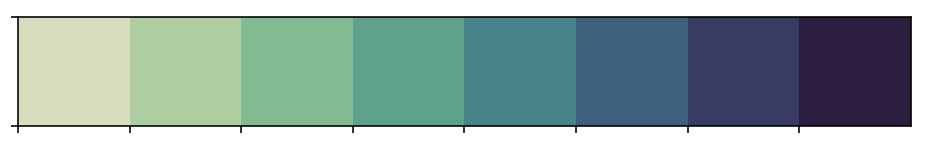

In [39]:
salary_total = by_playerID_df['Salary']
war_total = by_playerID_df['WAR']
hr_total = by_playerID_df['hr']
rbi_total = by_playerID_df['rbi']
batting_avg = by_playerID_df['ba']
on_base = by_playerID_df['obp']
games = by_playerID_df['g']
seasons = by_playerID_df=['Season']

war_color = sns.diverging_palette(125, 25, s=60, l=20,n=9, center="dark")
hr_color = sns.diverging_palette(450, 355, s=80, l=10,n=6, center="light")
ba_color = sns.diverging_palette(225, 5, s=20, l=40,n=9, center="dark")
obp_color = sns.diverging_palette(300, 40, s=40, l=60,n=9, center="dark")
games_color = sns.diverging_palette(175, 30, s=70, l=10,n=9, center="dark")
seasons_color = sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

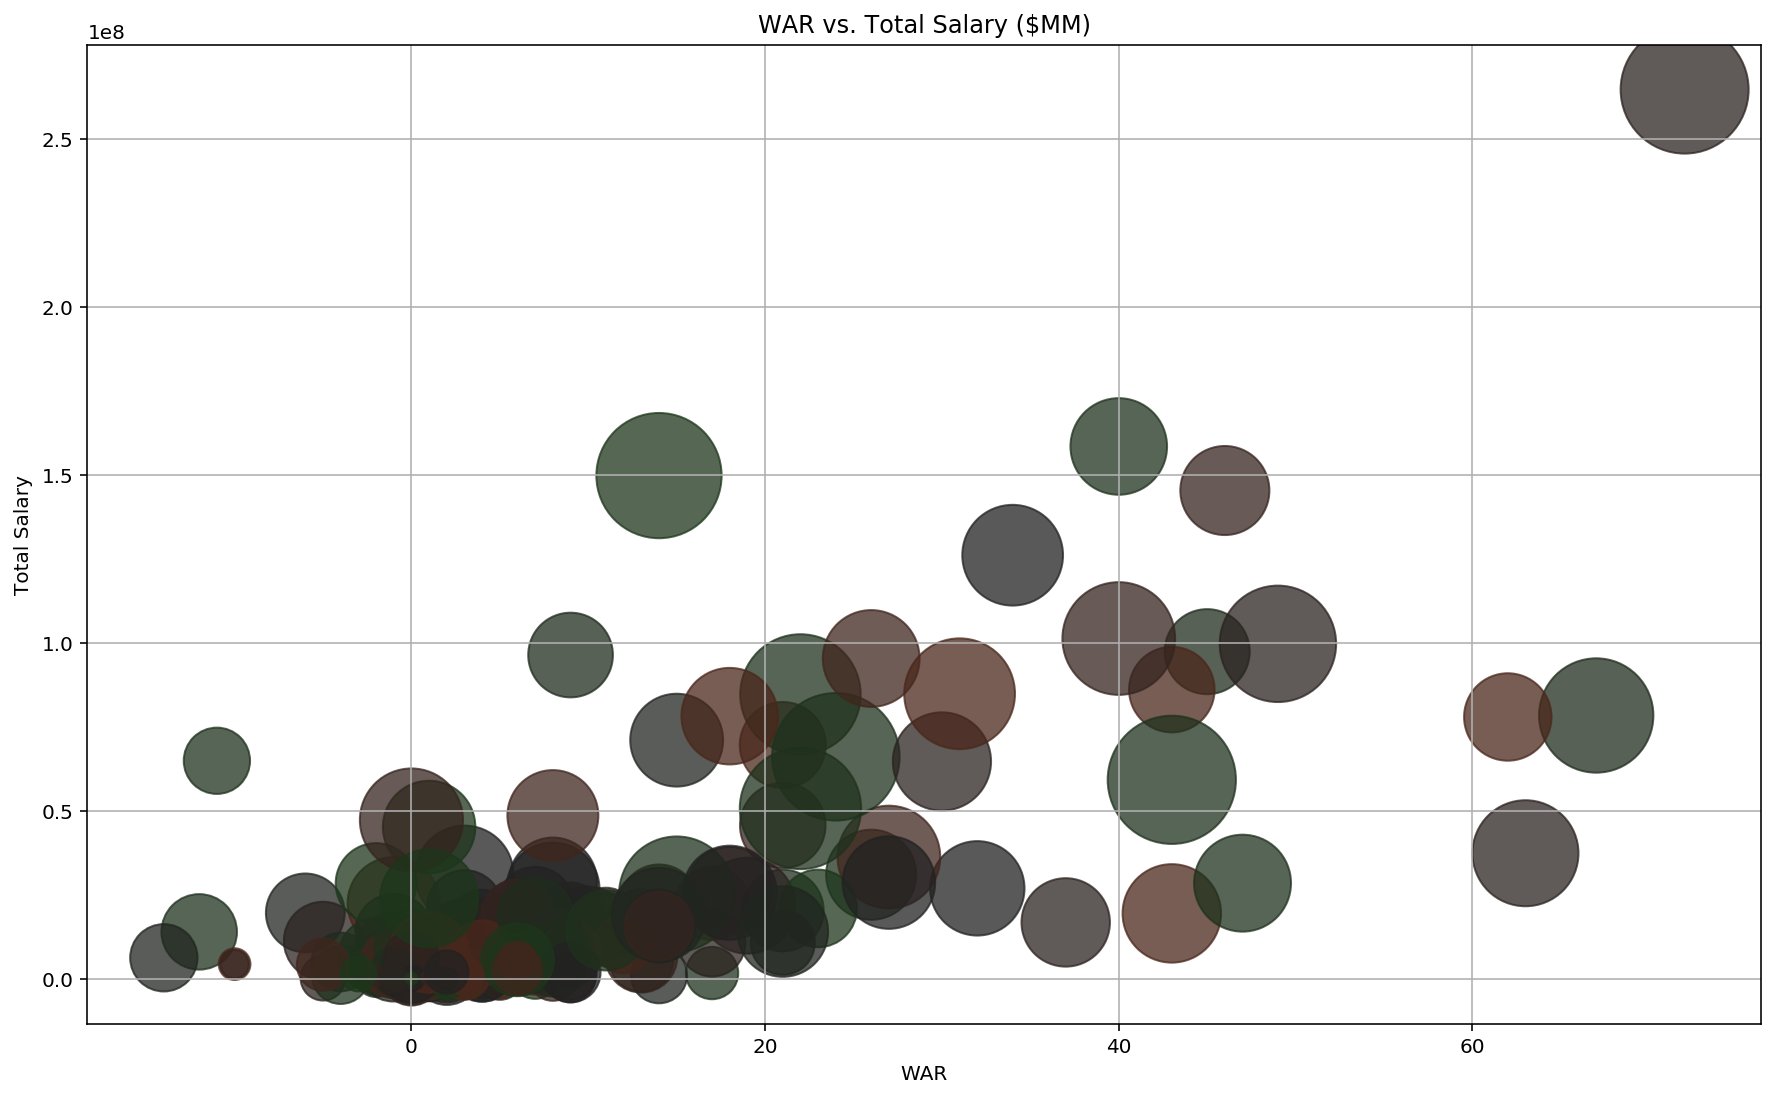

In [40]:
plt.figure(figsize=(20,8))

fig, ax = plt.subplots(1)
fig.set_size_inches((15, 9))

ax.scatter(war_total,salary_total,c=war_color,s=games*1.5,alpha=0.75,label='Games')

# Incorporate the other graph properties
ax.set_title("WAR vs. Total Salary ($MM)")
ax.set_ylabel("Total Salary")
ax.set_xlabel("WAR")
ax.grid(True)
plt.savefig("TotSalaryVsWar.png")

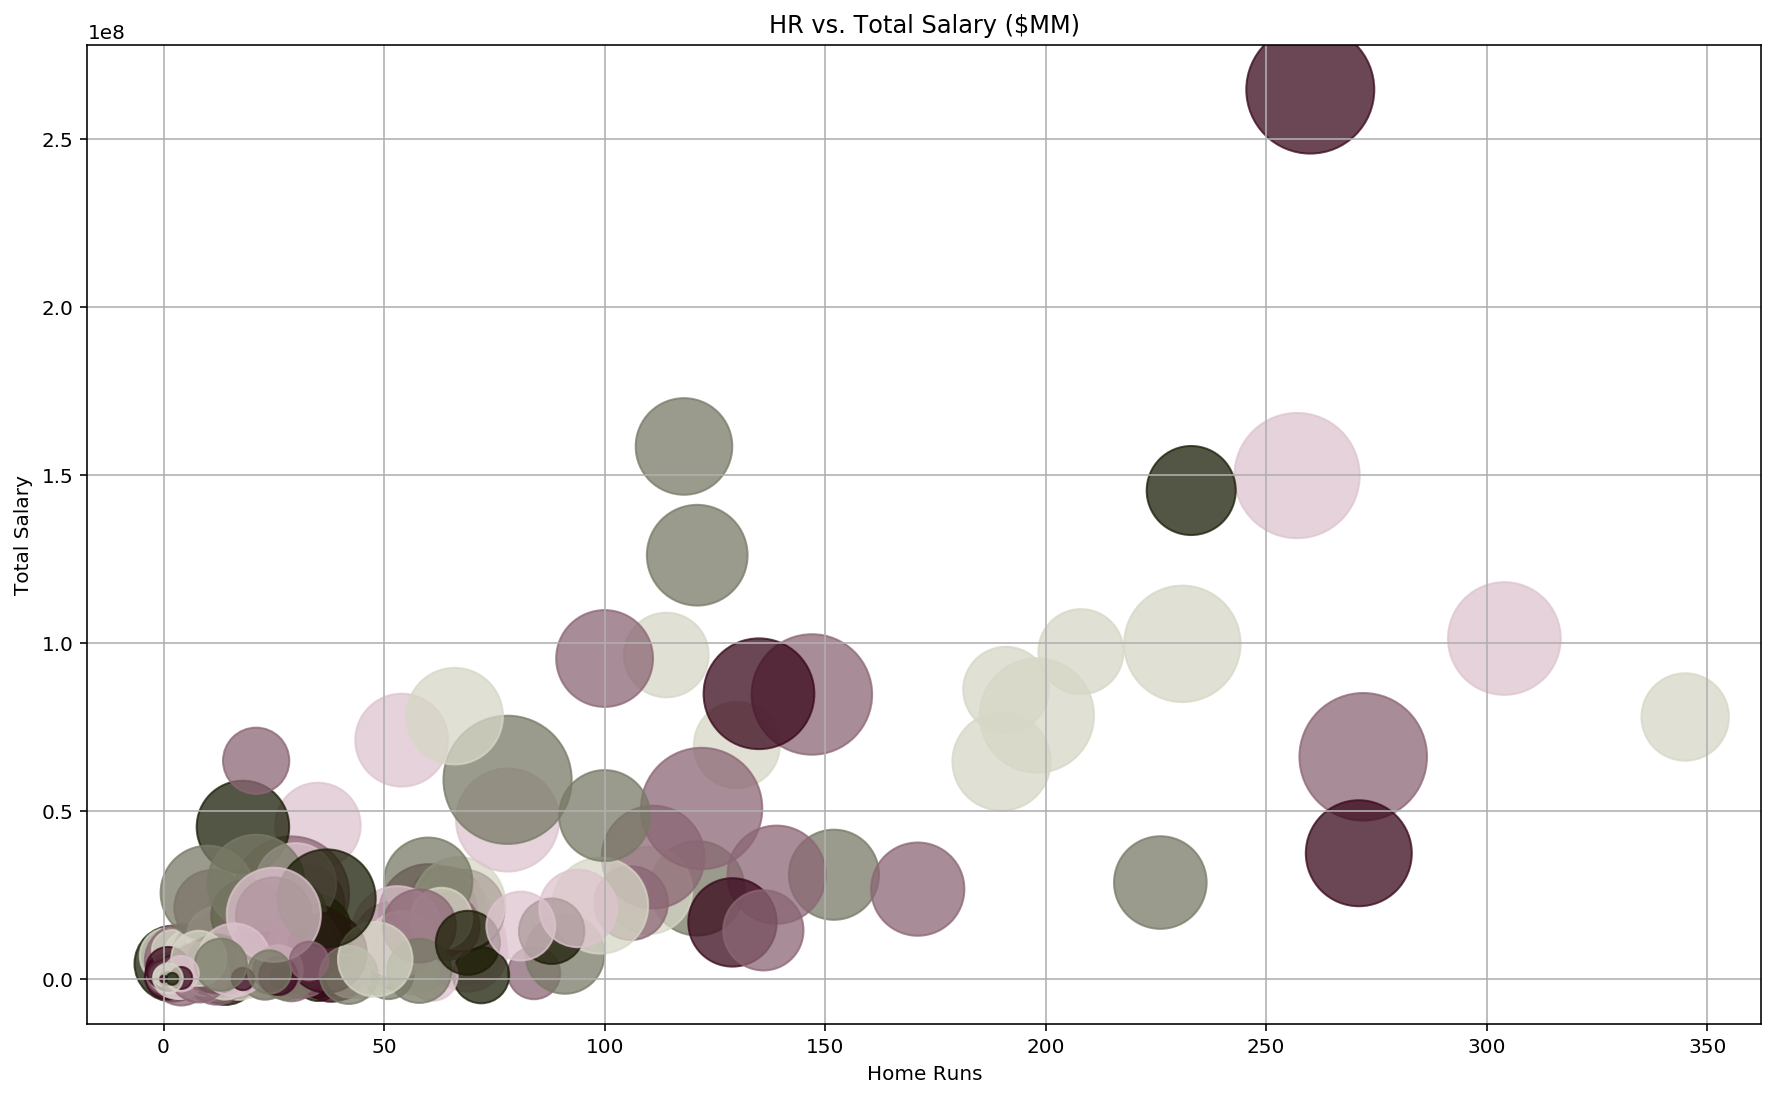

In [41]:
plt.figure(figsize=(20,8))

fig, ax = plt.subplots(1)
fig.set_size_inches((15, 9))

ax.scatter(hr_total,salary_total,c=hr_color,s=games*1.5,alpha=0.75,label='Games')

# Incorporate the other graph properties
ax.set_title("HR vs. Total Salary ($MM)")
ax.set_ylabel("Total Salary")
ax.set_xlabel("Home Runs")
ax.grid(True)
plt.savefig("salaryVSHR.png")

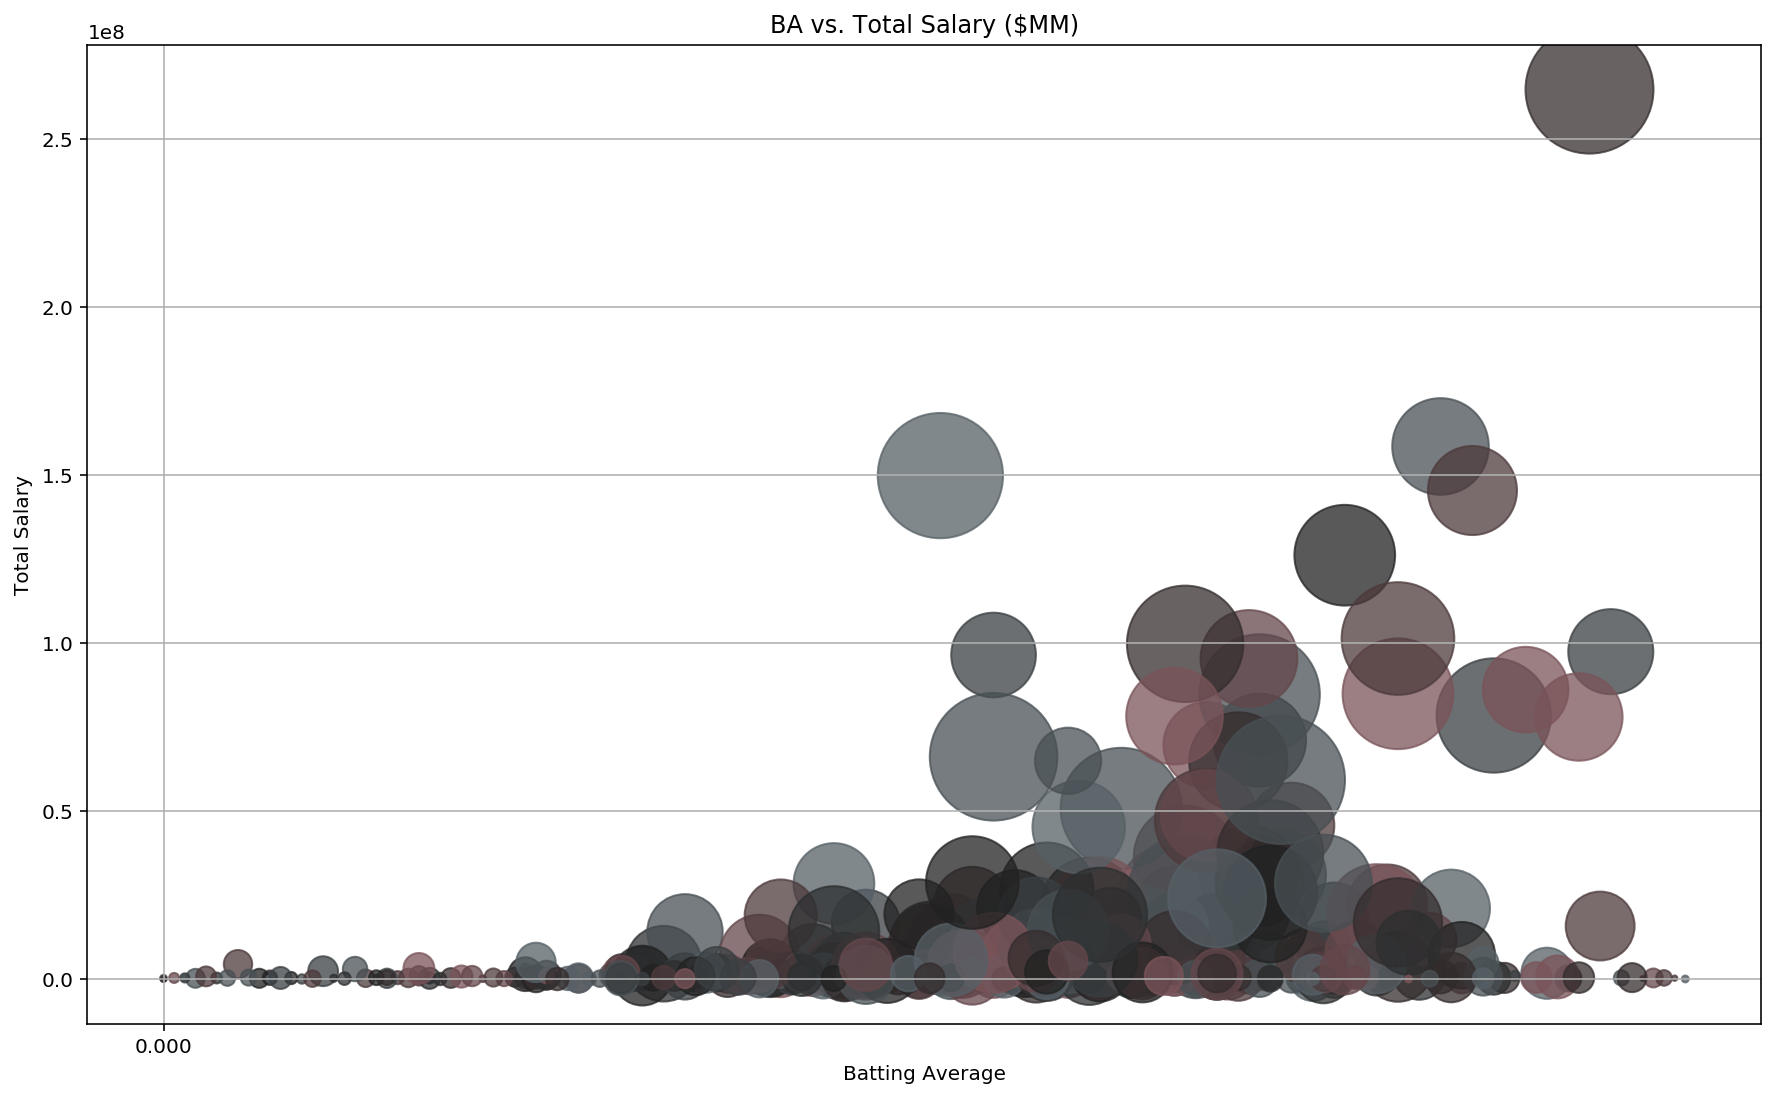

In [42]:
from matplotlib.ticker import FormatStrFormatter

# ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
# ax.yaxis.set_ticks(np.arange(-2, 2, 0.25))

plt.figure(figsize=(20,8))

fig, ax = plt.subplots(1)
fig.set_size_inches((15, 9))

ax.scatter(batting_avg,salary_total,c=ba_color,s=games*1.5,alpha=0.75,label='Games')

# Incorporate the other graph properties
ax.set_title("BA vs. Total Salary ($MM)")
ax.set_ylabel("Total Salary")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_ticks(np.arange(0,.5,.5))
ax.set_xlabel("Batting Average")

ax.grid(True)
plt.savefig("BAVStotSalary.png")

War vs. Salary - Plot.Ly

In [43]:

import plotly.graph_objs as go
import math


In [44]:

layout0 = dict(title = 'Career WAR vs. Career Salary',hovermode='closest',
              xaxis=dict(title='WAR', ticklen=5,gridwidth=2),
              yaxis=dict(title='Salary', hoverformat='$:.2f', ticklen=5,gridwidth=2),
              showlegend=True, legend=dict(x=-.1, y=1.2))   


trace0 = go.Scattergl(
    x=war_total,
    y=salary_total,
    mode='markers',
    name='WAR',
    marker=dict(
        color=hr_total.values,
        colorscale= 'bupu',
        showscale=True,
        symbol='circle',
        sizemode='area',
        sizeref=15,
        size=hr_total.values*25,
        line=dict(
            width=2
        ),
    
    )
)

data = [trace0]
fig = go.Figure(data=data, layout=layout0)
py.iplot(fig, filename='WarBubble')

JAVIER'S CODE FOR QUESTION B

In [46]:
#Javier Starting Code for Question 
#b. Does individual salary correlate to team's success? -Javier

from numpy import inf

#Clean data and change float values with 2 decimal places

pd.options.display.float_format = '{:,.2f}'.format
final_df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'nameGiven', 'debut', 'finalGame',
       'yearid', 'salary', 'teamid', 'lgid', 'g', 'ab', 'ba', 'r', 'h', '2b',
       '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf',
       'gidp', 'pos', 'gs'],
      dtype='object')

In [47]:
#Rename columns, I'm not familiar with abbreviations.
javier_df = final_df.rename(columns={'nameFirst':'Name', 'nameLast':"Last Name",'yearid':"Year", 'g':"Games", 
                                     'ab':"At Bat", 'r':"Runs", 'h':"Hits", '2b':"Doubles", '3b': "Triples",
                                     'hr':"Home_Runs", 'rbi':"Runs Batter In", 'sb': "Stolen Bases", 
                                     'cs': "Caught Stealing", 'bb':"Base on Balls", 'so':"Strikeouts", 
                                     'ibb':"Intentional Walks", 'hbp':"Hit by pitch", 'sh':"Sacrifice Hits", 
                                     'sf': "Sacrifice Files", 'gidp': "Grounded into Double Plays",'pos': "Position", 
                                     'gs':"Games Started"})
javier_df.head()

,playerID,Name,Last Name,nameGiven,debut,finalGame,Year,salary,teamid,lgid,...,Caught Stealing,Base on Balls,Strikeouts,Intentional Walks,Hit by pitch,Sacrifice Hits,Sacrifice Files,Grounded into Double Plays,Position,Games Started
36,flynndo01,Doug,Flynn,Robert Douglas,1975-04-09,1985-10-05,1985,350000,MON,NL,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,SS,0.00
1424,reynocr01,Craig,Reynolds,Gordon Craig,1975-08-01,1989-09-27,1985,350000,HOU,NL,...,4.00,12,30.00,2.00,0.00,3.00,2.00,4.00,SS,89.00
8219,schofdi02,Dick,Schofield,Richard Craig,1983-09-08,1996-09-29,1985,120000,CAL,AL,...,4.00,35,70.00,0.00,8.00,12.00,3.00,8.00,SS,132.00
8255,smithoz01,Ozzie,Smith,Osborne Earl,1978-04-07,1996-09-29,1985,1440000,SLN,NL,...,8.00,65,27.00,11.00,2.00,9.00,2.00,13.00,SS,158.00
1217,juraked01,Ed,Jurak,Edward James,1982-06-30,1989-06-26,1985,125000,BOS,AL,...,0.00,1,3.00,0.00,0.00,0.00,0.00,1.00,SS,0.00


In [48]:
#Calculate varios ratios of salary in order to identify the best relation of a player's salary to team's success

javier_df['Score'] = javier_df.Runs+javier_df.Home_Runs
javier_df['Score $'] = javier_df.salary / (javier_df.Runs+javier_df.Home_Runs)
javier_df['At Bat $'] =javier_df.salary / final_df.ab
javier_df['Runs $'] =javier_df.salary / final_df.r
javier_df['Hits $'] =javier_df.salary / final_df.h
javier_df['Runs Batter In $'] =javier_df.salary / final_df.rbi
javier_df['Stolen Bases $'] =javier_df.salary / final_df.sb
javier_df['Games Played $'] =javier_df.salary / final_df.sb
javier_df.groupby(['Year','playerID','lgid','teamid'])


javier_df.head()

,playerID,Name,Last Name,nameGiven,debut,finalGame,Year,salary,teamid,lgid,...,Position,Games Started,Score,Score $,At Bat $,Runs $,Hits $,Runs Batter In $,Stolen Bases $,Games Played $
36,flynndo01,Doug,Flynn,Robert Douglas,1975-04-09,1985-10-05,1985,350000,MON,NL,...,SS,0.00,0,inf,"58,333.33",inf,"350,000.00",inf,inf,inf
1424,reynocr01,Craig,Reynolds,Gordon Craig,1975-08-01,1989-09-27,1985,350000,HOU,NL,...,SS,89.00,47,"7,446.81",923.48,"8,139.53","3,398.06","10,937.50","87,500.00","87,500.00"
8219,schofdi02,Dick,Schofield,Richard Craig,1983-09-08,1996-09-29,1985,120000,CAL,AL,...,SS,132.00,58,"2,068.97",273.97,"2,400.00","1,250.00","2,926.83","10,909.09","10,909.09"
8255,smithoz01,Ozzie,Smith,Osborne Earl,1978-04-07,1996-09-29,1985,1440000,SLN,NL,...,SS,158.00,76,"18,947.37","2,681.56","20,571.43","9,729.73","26,666.67","46,451.61","46,451.61"
1217,juraked01,Ed,Jurak,Edward James,1982-06-30,1989-06-26,1985,125000,BOS,AL,...,SS,0.00,4,"31,250.00","9,615.38","31,250.00","41,666.67",inf,inf,inf


In [49]:
#Clean data where ratios returned 'inf' values, replacing 'inf' with 'Nan'
jl_df=javier_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Score $', 'At Bat $','Runs $','Hits $',
                                                                  'Runs Batter In $','Stolen Bases $',
                                                                  'Games Played $' ], how="all")
jl_df

,playerID,Name,Last Name,nameGiven,debut,finalGame,Year,salary,teamid,lgid,...,Position,Games Started,Score,Score $,At Bat $,Runs $,Hits $,Runs Batter In $,Stolen Bases $,Games Played $
36,flynndo01,Doug,Flynn,Robert Douglas,1975-04-09,1985-10-05,1985,350000,MON,NL,...,SS,0.00,0,nan,"58,333.33",nan,"350,000.00",nan,nan,nan
1424,reynocr01,Craig,Reynolds,Gordon Craig,1975-08-01,1989-09-27,1985,350000,HOU,NL,...,SS,89.00,47,"7,446.81",923.48,"8,139.53","3,398.06","10,937.50","87,500.00","87,500.00"
8219,schofdi02,Dick,Schofield,Richard Craig,1983-09-08,1996-09-29,1985,120000,CAL,AL,...,SS,132.00,58,"2,068.97",273.97,"2,400.00","1,250.00","2,926.83","10,909.09","10,909.09"
8255,smithoz01,Ozzie,Smith,Osborne Earl,1978-04-07,1996-09-29,1985,1440000,SLN,NL,...,SS,158.00,76,"18,947.37","2,681.56","20,571.43","9,729.73","26,666.67","46,451.61","46,451.61"
1217,juraked01,Ed,Jurak,Edward James,1982-06-30,1989-06-26,1985,125000,BOS,AL,...,SS,0.00,4,"31,250.00","9,615.38","31,250.00","41,666.67",nan,nan,nan
9050,duncama01,Mariano,Duncan,Mariano,1985-04-09,1997-09-17,1985,60000,LAN,NL,...,SS,120.00,80,750.00,106.76,810.81,437.96,"1,538.46","1,578.95","1,578.95"
1148,schmimi01,Mike,Schmidt,Michael Jack,1972-09-12,1989-05-28,1985,2130300,PHI,NL,...,SS,0.00,122,"17,461.48","3,880.33","23,935.96","14,015.13","22,906.45","2,130,300.00","2,130,300.00"
9490,sandbry01,Ryne,Sandberg,Ryne Dee,1981-09-02,1997-09-28,1985,505000,CHN,NL,...,SS,0.00,139,"3,633.09",829.23,"4,469.03","2,715.05","6,084.34","9,351.85","9,351.85"
8161,trammal01,Alan,Trammell,Alan Stuart,1977-09-09,1996-09-29,1985,517143,DET,AL,...,SS,149.00,92,"5,621.12",854.78,"6,546.11","3,315.02","9,072.68","36,938.79","36,938.79"
1008,gutieja01,Jackie,Gutierrez,Joaquin Fernando,1983-09-06,1988-10-01,1985,130000,BOS,AL,...,SS,83.00,35,"3,714.29",472.73,"3,939.39","2,166.67","6,190.48","13,000.00","13,000.00"


In [50]:
#Clean data even further by eliminating the 'NaN' values with 0

jl_df1 = jl_df.fillna(0)
jl_df2 = jl_df1.set_index('playerID')
jl_df3 = jl_df2.sort_values('Score $', ascending=False)
#jl_df3.to_csv("jl_df3.csv", index=False)
jl_top10 = jl_df3.head(10)
jl_bottom10 = jl_df3[jl_df3['Score $']>= 1].tail(10)



In [51]:
# Table of top 10 most expensive scores
jl_top10

,Name,Last Name,nameGiven,debut,finalGame,Year,salary,teamid,lgid,Games,...,Position,Games Started,Score,Score $,At Bat $,Runs $,Hits $,Runs Batter In $,Stolen Bases $,Games Played $
playerID,,,,,,,,,,,,,,,,,,,,,
youngmi02,Michael,Young,Michael Brian,2000-09-29,2013-09-29,2013,18374975,LAN,NL,21,...,SS,1.00,3,"6,124,991.67","360,293.63","6,124,991.67","1,148,435.94","4,593,743.75",0.00,0.00
gonzaal01,Alex,Gonzalez,Alexander Scott,1994-04-04,2006-05-20,2004,5750000,SDN,NL,11,...,SS,35.00,2,"2,875,000.00","250,000.00","2,875,000.00","1,437,500.00","1,916,666.67",0.00,0.00
gonzaal01,Alex,Gonzalez,Alexander Scott,1994-04-04,2006-05-20,2004,5750000,SDN,NL,11,...,SS,33.00,2,"2,875,000.00","250,000.00","2,875,000.00","1,437,500.00","1,916,666.67",0.00,0.00
gonzaal01,Alex,Gonzalez,Alexander Scott,1994-04-04,2006-05-20,2004,5750000,SDN,NL,11,...,SS,9.00,2,"2,875,000.00","250,000.00","2,875,000.00","1,437,500.00","1,916,666.67",0.00,0.00
gutieri01,Ricky,Gutierrez,Ricardo,1993-04-13,2004-10-03,2004,4166667,NYN,NL,24,...,SS,3.00,2,"2,083,333.50","66,137.57","2,083,333.50","378,787.91","833,333.40",0.00,0.00
guzmacr01,Cristian,Guzman,Cristian,1999-04-06,2010-09-08,2010,8000000,TEX,AL,15,...,SS,16.00,4,"2,000,000.00","173,913.04","2,000,000.00","1,142,857.14","8,000,000.00",0.00,0.00
guzmacr01,Cristian,Guzman,Cristian,1999-04-06,2010-09-08,2010,8000000,TEX,AL,15,...,SS,2.00,4,"2,000,000.00","173,913.04","2,000,000.00","1,142,857.14","8,000,000.00",0.00,0.00
gutieri01,Ricky,Gutierrez,Ricardo,1993-04-13,2004-10-03,2003,3916667,CLE,AL,16,...,SS,9.00,2,"1,958,333.50","78,333.34","1,958,333.50","301,282.08","1,305,555.67",0.00,0.00
jeterde01,Derek,Jeter,Derek Sanderson,1995-05-29,2014-09-28,2013,16729365,NYA,AL,17,...,SS,13.00,9,"1,858,818.33","265,545.48","2,091,170.62","1,394,113.75","2,389,909.29",0.00,0.00


In [52]:
# Table of bottom 10 least expensive scores

jl_bottom10

,Name,Last Name,nameGiven,debut,finalGame,Year,salary,teamid,lgid,Games,...,Position,Games Started,Score,Score $,At Bat $,Runs $,Hits $,Runs Batter In $,Stolen Bases $,Games Played $
playerID,,,,,,,,,,,,,,,,,,,,,
mitchke01,Kevin,Mitchell,Kevin Darnell,1984-09-04,1998-08-03,1986,60000,NYN,NL,108,...,SS,20.00,63,952.38,182.93,"1,176.47",659.34,"1,395.35","20,000.00","20,000.00"
roberbi01,Bip,Roberts,Leon Joseph,1986-04-07,1998-09-27,1989,74000,SDN,NL,117,...,SS,12.00,84,880.95,224.92,913.58,747.47,"2,960.00","3,523.81","3,523.81"
colesda01,Darnell,Coles,Darnell,1983-09-04,1997-05-22,1986,75000,DET,AL,142,...,SS,0.00,87,862.07,143.95,"1,119.40",528.17,872.09,"12,500.00","12,500.00"
snydeco02,Cory,Snyder,James Cory,1986-06-13,1994-08-10,1987,90000,CLE,AL,157,...,SS,15.00,107,841.12,155.98,"1,216.22",661.76,"1,097.56","18,000.00","18,000.00"
guilloz01,Ozzie,Guillen,Oswaldo Jose,1985-04-09,2000-10-01,1985,60000,CHA,AL,150,...,SS,131.00,72,833.33,122.20,845.07,447.76,"1,818.18","8,571.43","8,571.43"
sveumda01,Dale,Sveum,Dale Curtis,1986-05-12,1999-10-03,1987,92500,ML4,AL,153,...,SS,139.00,111,833.33,172.90,"1,075.58",685.19,973.68,"46,250.00","46,250.00"
thompro01,Robby,Thompson,Robert Randall,1986-04-08,1996-09-22,1986,60000,SFN,NL,149,...,SS,0.00,80,750.00,109.29,821.92,402.68,"1,276.60","5,000.00","5,000.00"
duncama01,Mariano,Duncan,Mariano,1985-04-09,1997-09-17,1985,60000,LAN,NL,142,...,SS,120.00,80,750.00,106.76,810.81,437.96,"1,538.46","1,578.95","1,578.95"
saboch01,Chris,Sabo,Christopher Andrew,1988-04-04,1996-09-02,1988,62500,CIN,NL,137,...,SS,0.00,85,735.29,116.17,844.59,428.08,"1,420.45","1,358.70","1,358.70"


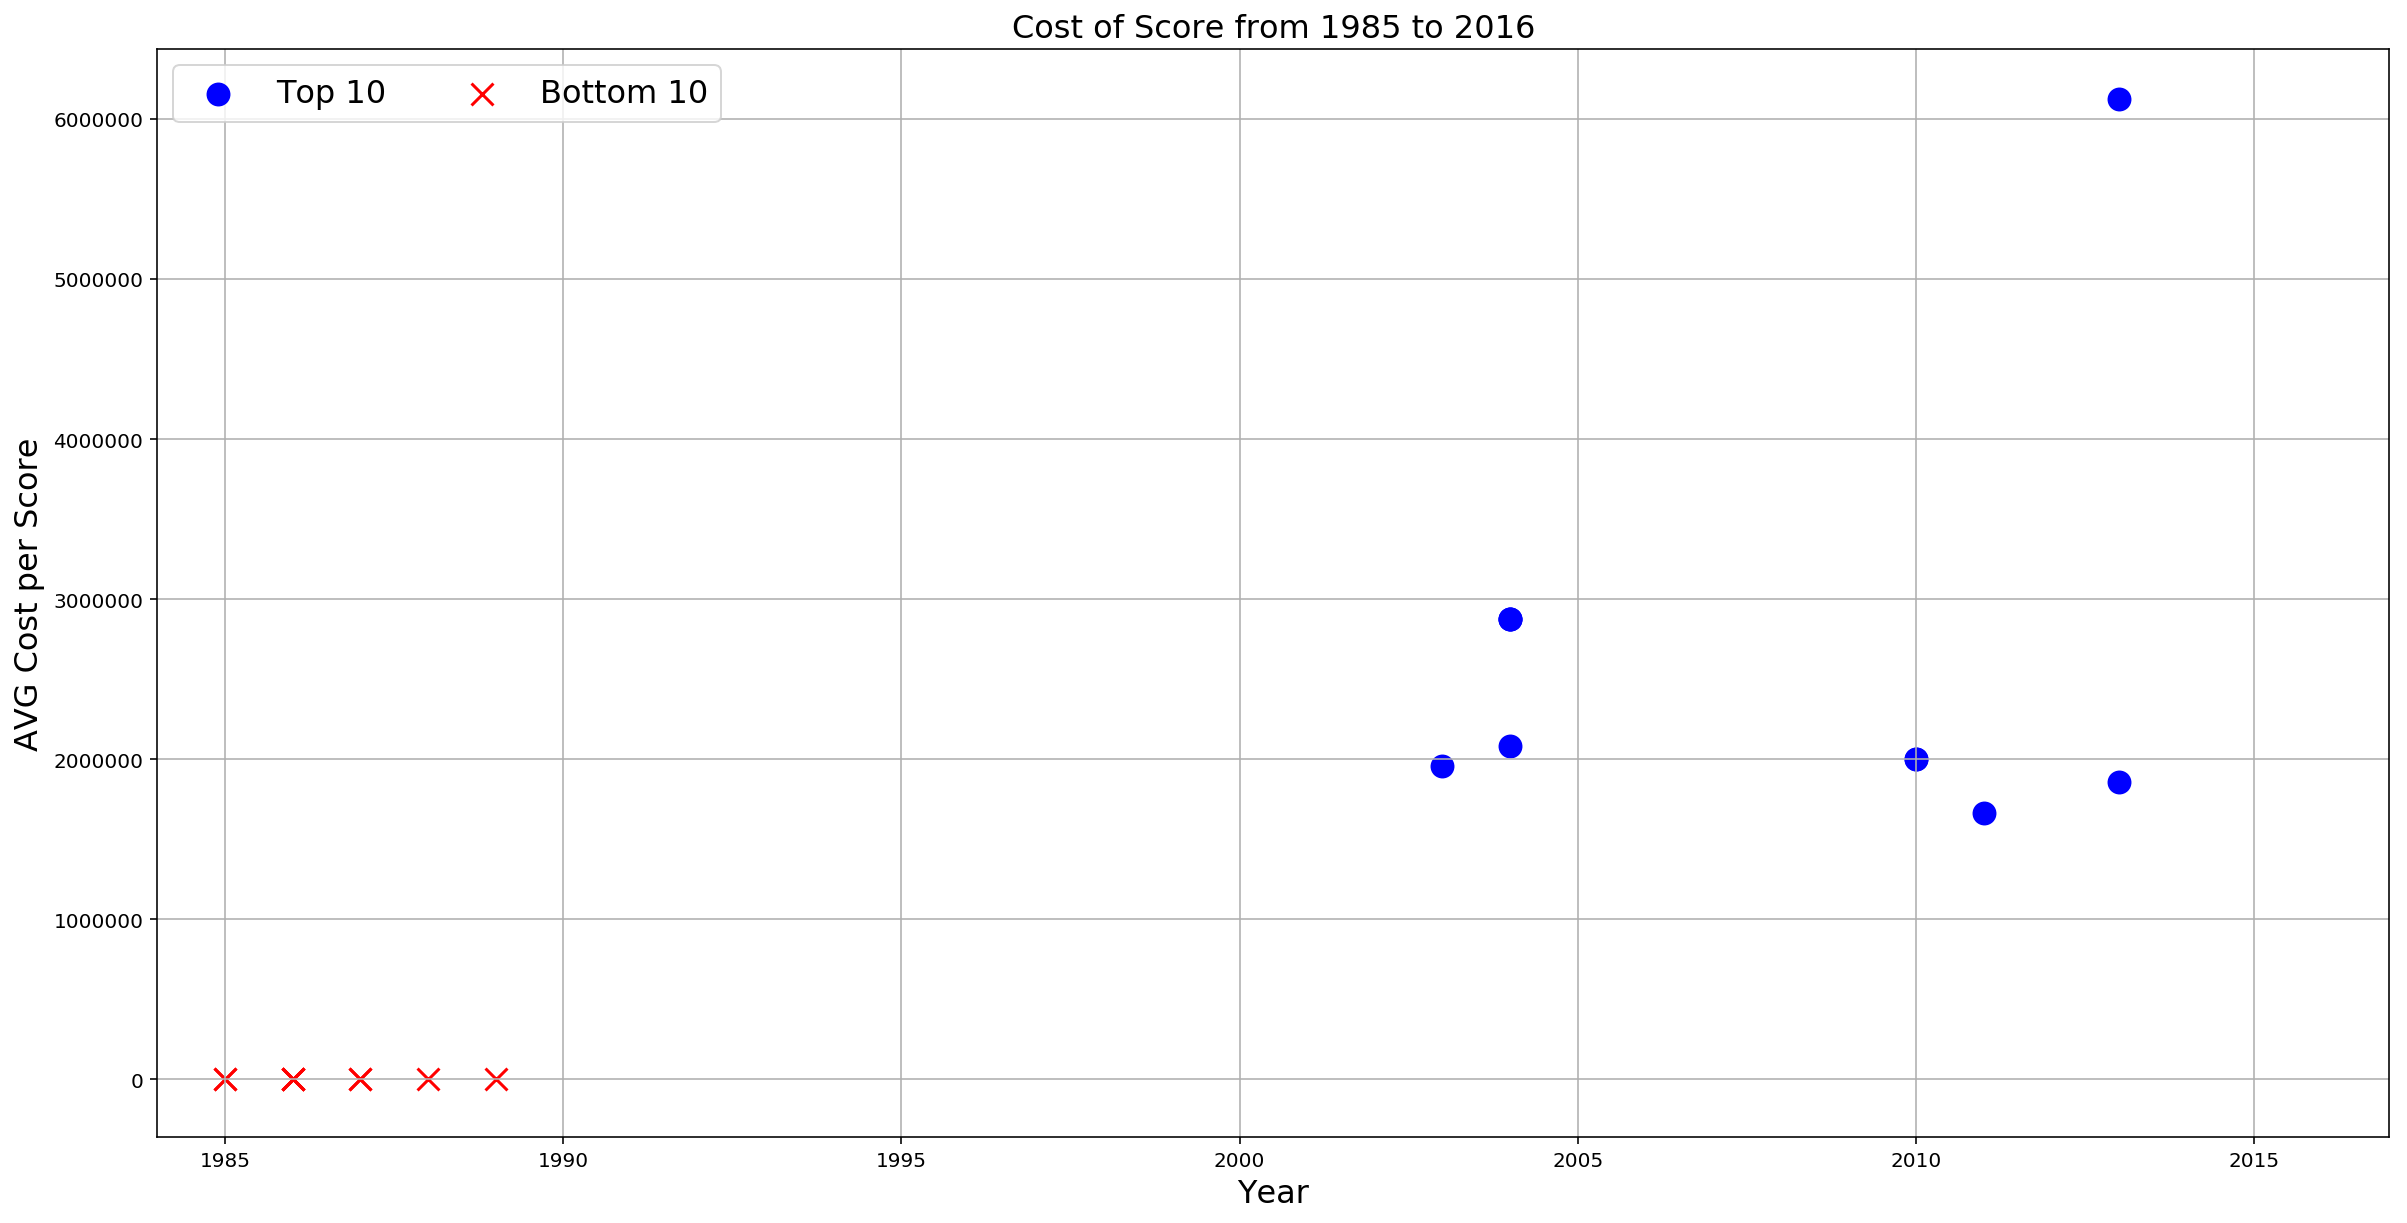

In [53]:
#Created scatterplot of the cost of the average cost of each Home Run for each Shortstop per year.

ax = jl_top10.plot(kind='scatter', x='Year', s=120,marker='o',y='Score $',color='b', label='Top 10',grid=True, figsize=(20,10))
jl_bottom10.plot(kind='scatter', x='Year', s=120, marker='x',y='Score $',color='r', label='Bottom 10' ,grid=True,ax=ax)
plt.legend(loc='upper left', numpoints=50, ncol=3, fontsize=16)
plt.title("Cost of Score from 1985 to 2016", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.ylabel('AVG Cost per Score',fontsize=16)
plt.xlim(1984,2017)
plt.savefig('Cost of Score.png')

plt.show()

In [54]:
#Per the previous analysis I noticed that in 2013 there was an outlier

t_2013 = teams_df[teams_df['yearid'] == 2013]
t_2013s = t_2013.sort_values('w', ascending=False)
#t_2013s.head()
newt2013 = t_2013s.set_index('name')
newt2013.head(10)

,yearid,lgid,teamid,franchid,divid,rank,g,ghome,w,l,...,e,dp,fp,park,attendance,bpf,ppf,teamidbr,teamidlahman45,teamidretro
name,,,,,,,,,,,,,,,,,,,,,
Boston Red Sox,2013,AL,BOS,BOS,E,1,162,81.00,97,65,...,80,142,0.99,Fenway Park II,"2,833,333.00",102,102,BOS,BOS,BOS
St. Louis Cardinals,2013,NL,SLN,STL,C,1,162,81.00,97,65,...,75,177,0.99,Busch Stadium III,"3,369,769.00",99,97,STL,SLN,SLN
Atlanta Braves,2013,NL,ATL,ATL,E,1,162,81.00,96,66,...,85,141,0.99,Turner Field,"2,548,679.00",104,103,ATL,ATL,ATL
Oakland Athletics,2013,AL,OAK,OAK,W,1,162,81.00,96,66,...,97,112,0.98,O.co Coliseum,"1,809,302.00",95,93,OAK,OAK,OAK
Pittsburgh Pirates,2013,NL,PIT,PIT,C,2,162,81.00,94,68,...,106,154,0.98,PNC Park,"2,256,862.00",94,94,PIT,PIT,PIT
Detroit Tigers,2013,AL,DET,DET,C,1,162,81.00,93,69,...,76,136,0.99,Comerica Park,"3,083,397.00",106,105,DET,DET,DET
Tampa Bay Rays,2013,AL,TBA,TBD,E,2,163,81.00,92,71,...,59,147,0.99,Tropicana Field,"1,510,300.00",96,95,TBR,TBA,TBA
Cleveland Indians,2013,AL,CLE,CLE,C,2,162,81.00,92,70,...,98,135,0.98,Progressive Field,"1,572,926.00",93,94,CLE,CLE,CLE
Los Angeles Dodgers,2013,NL,LAN,LAD,W,1,162,81.00,92,70,...,109,160,0.98,Dodger Stadium,"3,743,527.00",95,95,LAD,LAN,LAN


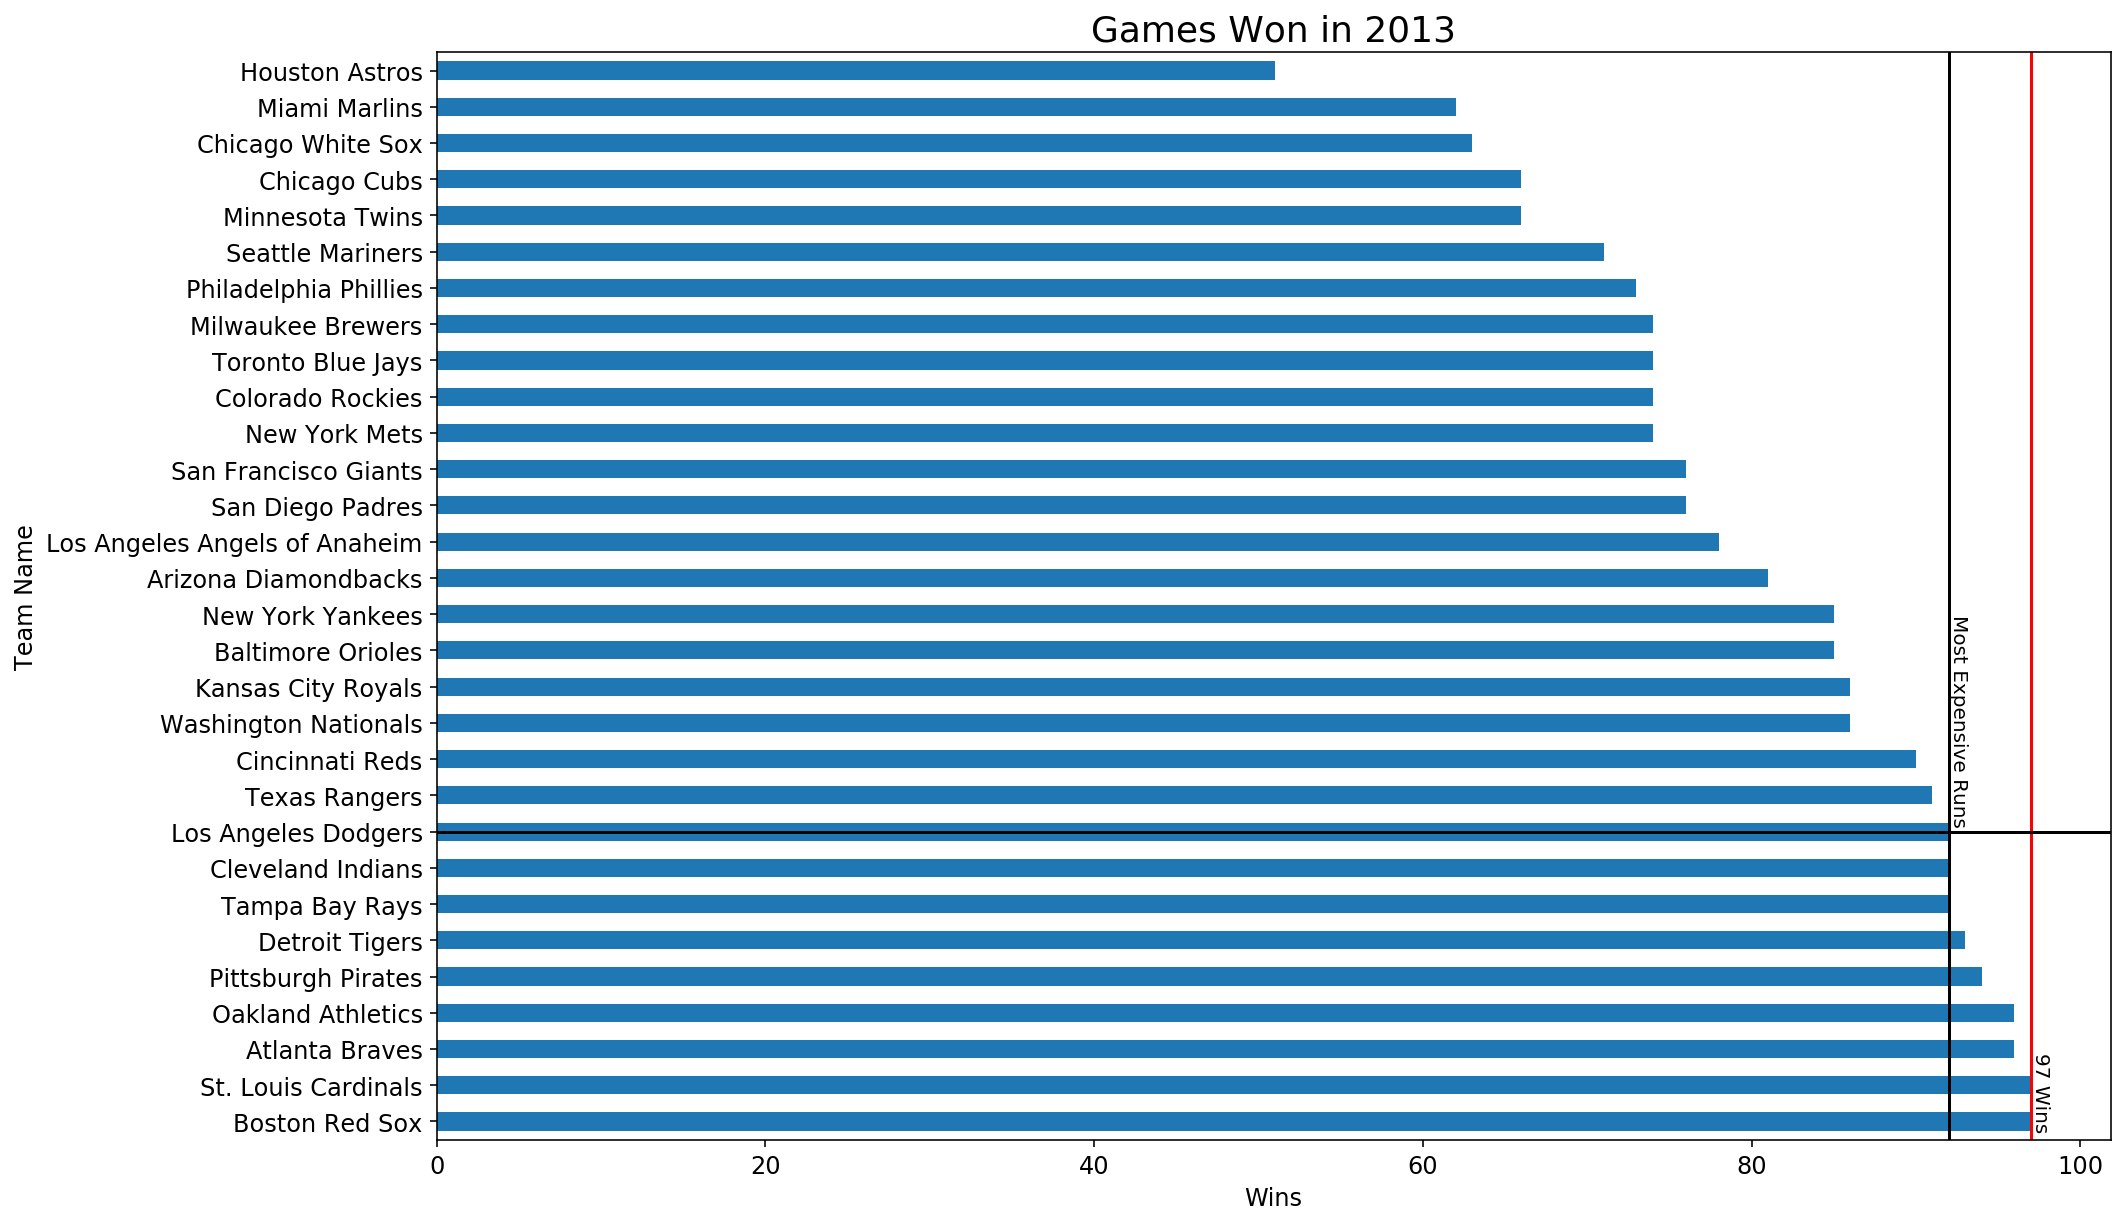

In [55]:
ax = newt2013[['w']].plot(kind='barh',  figsize=(15, 10), legend=False, fontsize=12)
ax.set_title("Games Won in 2013", fontsize=18)
ax.set_xlabel("Wins", fontsize=12)
ax.set_ylabel("Team Name", fontsize=12)
ax.axvline(97,0, color='r')
plt.text(97,1.5,'97 Wins',rotation=270)
ax.axvline(92,0, color='black')
ax.axhline(8,0, color='black')
plt.text(92,13.6,'Most Expensive Runs',rotation=270, color='black')
plt.savefig('2013 Games Won by Team.png')
plt.show()

BRYAN'S CODE FOR QUESTION 3

In [56]:
#Bryan's code

#Group the salaries by mean 
yearly_average_salary = pd.DataFrame(salary_df.groupby('yearid').mean())
yearly_average_salary.head()

,salary
yearid,
1985,"476,299.45"
1986,"417,147.04"
1987,"434,729.47"
1988,"453,171.08"
1989,"506,323.08"


In [58]:
#Read inflation data from CSV (Source- Bureau of Labor Statistics)
cpi = pd.read_csv("CPI_1985-2017_raw.csv")
cpi_df = pd.DataFrame(cpi)
cpi_year = cpi_df["yearid"]
cpi_df.set_index('yearid', inplace=True)
cpi_df.head()

,cpi
yearid,
1985,107.60
1986,109.60
1987,113.60
1988,118.30
1989,124.00


In [59]:
#Read real median household income data from CSV (Source- FRED St. Louis Fed)
real_median_hh_income = pd.read_csv("real_median_hh_income.csv")
real_median_hh_income_df = pd.DataFrame(real_median_hh_income)
real_median_hh_income_year = real_median_hh_income_df["yearid"]
real_median_hh_income_df.set_index('yearid', inplace=True)
real_median_hh_income_df.head()

,real_median_hh_income
yearid,
1985,50258
1986,52068
1987,52690
1988,53124
1989,54042


In [60]:
#Calculate inflation-adjusted average annual SS salary
cpi_adjust = cpi_df["cpi"]
current_cpi = cpi_df.iloc[-1][-1]
for i in yearly_average_salary:
    adjusted_yearly_average_salary = yearly_average_salary[i] * current_cpi / cpi_adjust
adjusted_yearly_average_salary.head()

yearid
1985   1,085,042.01
1986     932,947.84
1987     938,035.97
1988     938,979.67
1989   1,000,886.40
dtype: float64

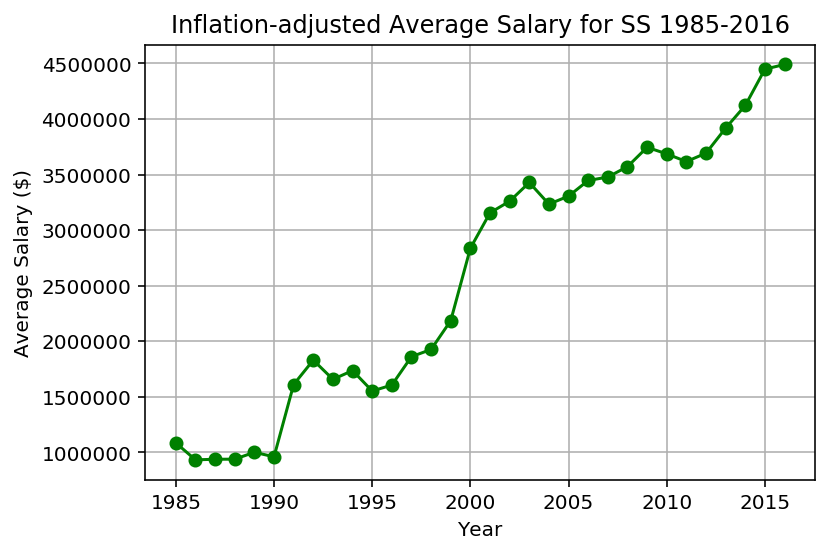

In [61]:
#Plot inflation-adjusted average annual salary
year = cpi_year
plt.plot(year, adjusted_yearly_average_salary, marker ="o", color="green", label=year)

plt.title("Inflation-adjusted Average Salary for SS 1985-2016")
plt.ylabel("Average Salary ($)")
plt.xlabel("Year")
plt.grid(True)

plt.savefig("Inflation-adjusted_Average_Salary_SS.png")
plt.show()

In [62]:
#Calculate the percentage change SS salary
yearly_salary_pct_change = 100.0 *  (adjusted_yearly_average_salary - adjusted_yearly_average_salary.iloc[0]) / adjusted_yearly_average_salary.iloc[0]
yearly_salary_pct_change.tail()

yearid
2013   261.07
2014   279.84
2015   309.97
2016   313.82
2017      nan
dtype: float64

In [63]:
#Calculate the percentage change in real median household income
annual_pct_change_median_hh_income = 100.0 *  (real_median_hh_income_df - real_median_hh_income_df.iloc[0]) / real_median_hh_income_df.iloc[0]
annual_pct_change_median_hh_income.tail()

,real_median_hh_income
yearid,
2012,6.11
2013,9.86
2014,8.24
2015,13.87
2016,17.47


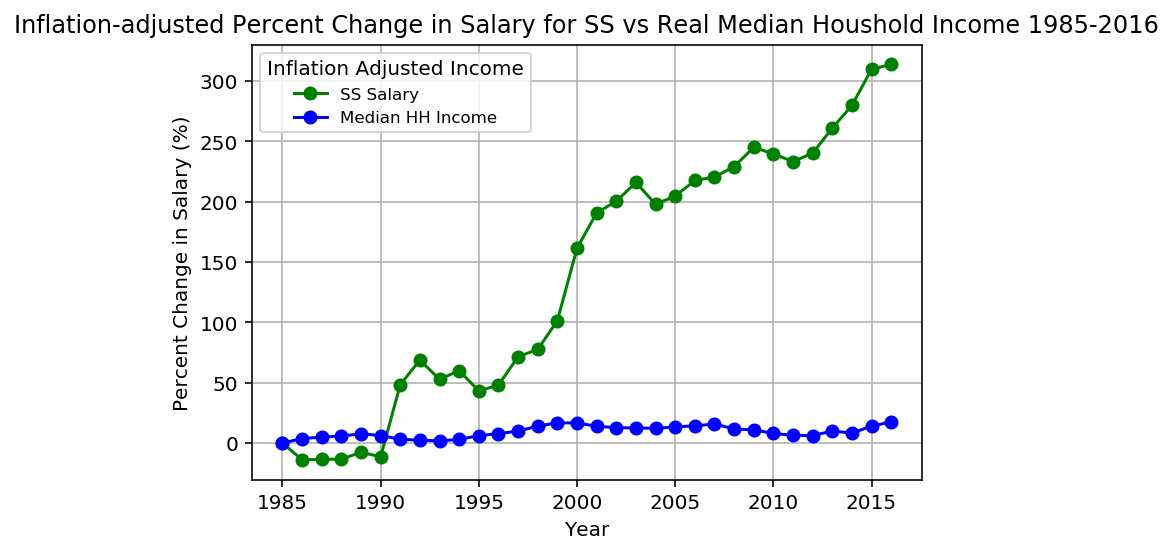

In [64]:
#Plot inflation-adjusted average annual salary percentage change
year = real_median_hh_income_year
plt.plot(year, yearly_salary_pct_change[0:32], marker ="o", color="green", label="SS Salary")
plt.plot(year, annual_pct_change_median_hh_income, marker ="o", color="blue", label="Median HH Income")
plt.title("Inflation-adjusted Percent Change in Salary for SS vs Real Median Houshold Income 1985-2016")
plt.ylabel("Percent Change in Salary (%)")
plt.xlabel("Year")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Inflation Adjusted Income", 
                  labelspacing=0.5)

plt.savefig("Percent_Change_in_Salary_SS_vs_median_hh_income.png")
plt.show()